# 5장 기본 실무 기술

## 5.4 과소적합 과대적합

/Users/haesun/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=1.95073e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


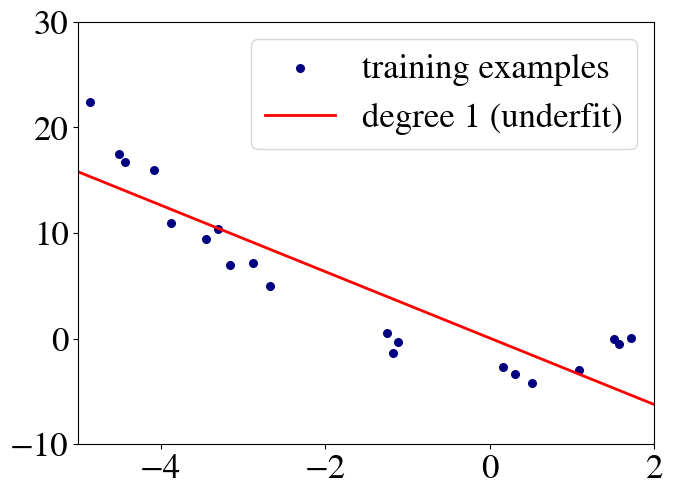

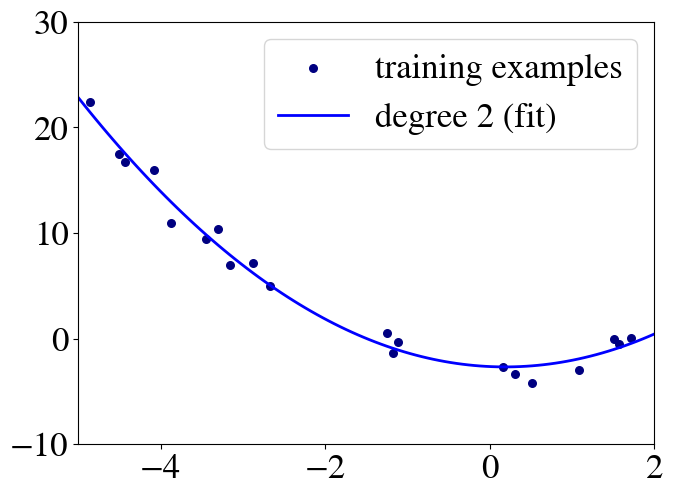

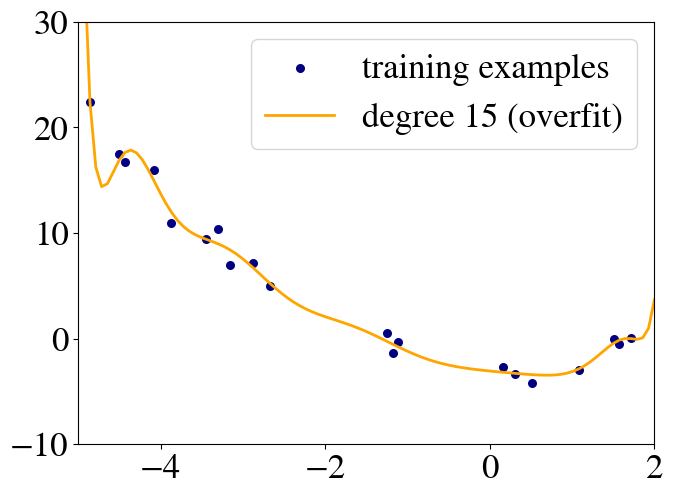

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 25})


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * (x)


# generate points used to plot
x_plot = np.linspace(-5, 2, 100)

# generate points and keep a subset of them
x = np.linspace(-5, 2, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
noize = [(-5 + np.random.random()*5) for i in range(len(x))]
y = f(x) + noize

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['red', 'blue', 'orange']
lw = 2

fit = ["underfit", "fit", "overfit"]
for count, degree in enumerate([1, 2, 15]):
    plt.figure(count)
    axes = plt.gca()
    axes.set_xlim([-5,2])
    axes.set_ylim([-10,30])
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training examples")
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label=("degree %d (" + fit[count] + ")") % degree)

    plt.legend(loc='best')
    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)

plt.show()